In [507]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [508]:
data=pd.read_csv("Travel.csv")
data.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [509]:
data.shape

(4888, 20)

In [510]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [511]:
data.isna().sum()


CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [512]:
data.ProductPitched.unique()

array(['Deluxe', 'Basic', 'Standard', 'Super Deluxe', 'King'],
      dtype=object)

In [513]:
for i in data.columns:
    for x in data[i]:
        try:
            float(x)
            x=x.strip()
        except:
            pass

In [514]:
data["Gender"]=data["Gender"].replace("Fe Male","Female")

In [515]:
cols=data.columns.tolist()
cols.remove("CustomerID")
for i in cols:
    print(f"{i} unique counts : {data[i].value_counts()}")
data.ProductPitched.value_counts()
cols

ProdTaken unique counts : ProdTaken
0    3968
1     920
Name: count, dtype: int64
Age unique counts : Age
35.0    237
36.0    231
34.0    211
31.0    203
30.0    199
32.0    197
33.0    189
37.0    185
29.0    178
38.0    176
41.0    155
39.0    150
28.0    147
40.0    146
42.0    142
27.0    138
43.0    130
46.0    121
45.0    116
26.0    106
44.0    105
51.0     90
47.0     88
50.0     86
25.0     74
52.0     68
53.0     66
48.0     65
49.0     65
55.0     64
54.0     61
56.0     58
24.0     56
22.0     46
23.0     46
59.0     44
21.0     41
20.0     38
19.0     32
58.0     31
57.0     29
60.0     29
18.0     14
61.0      9
Name: count, dtype: int64
TypeofContact unique counts : TypeofContact
Self Enquiry       3444
Company Invited    1419
Name: count, dtype: int64
CityTier unique counts : CityTier
1    3190
3    1500
2     198
Name: count, dtype: int64
DurationOfPitch unique counts : DurationOfPitch
9.0      483
7.0      342
8.0      333
6.0      307
16.0     274
15.0     269
14.0  

['ProdTaken',
 'Age',
 'TypeofContact',
 'CityTier',
 'DurationOfPitch',
 'Occupation',
 'Gender',
 'NumberOfPersonVisiting',
 'NumberOfFollowups',
 'ProductPitched',
 'PreferredPropertyStar',
 'MaritalStatus',
 'NumberOfTrips',
 'Passport',
 'PitchSatisfactionScore',
 'OwnCar',
 'NumberOfChildrenVisiting',
 'Designation',
 'MonthlyIncome']

In [516]:
categorical=[feature for feature in data.columns if data[feature].dtype=="O"] 
categorical
numerical=[feature for feature in data.columns if data[feature].dtype!="O"] 
numerical

['CustomerID',
 'ProdTaken',
 'Age',
 'CityTier',
 'DurationOfPitch',
 'NumberOfPersonVisiting',
 'NumberOfFollowups',
 'PreferredPropertyStar',
 'NumberOfTrips',
 'Passport',
 'PitchSatisfactionScore',
 'OwnCar',
 'NumberOfChildrenVisiting',
 'MonthlyIncome']

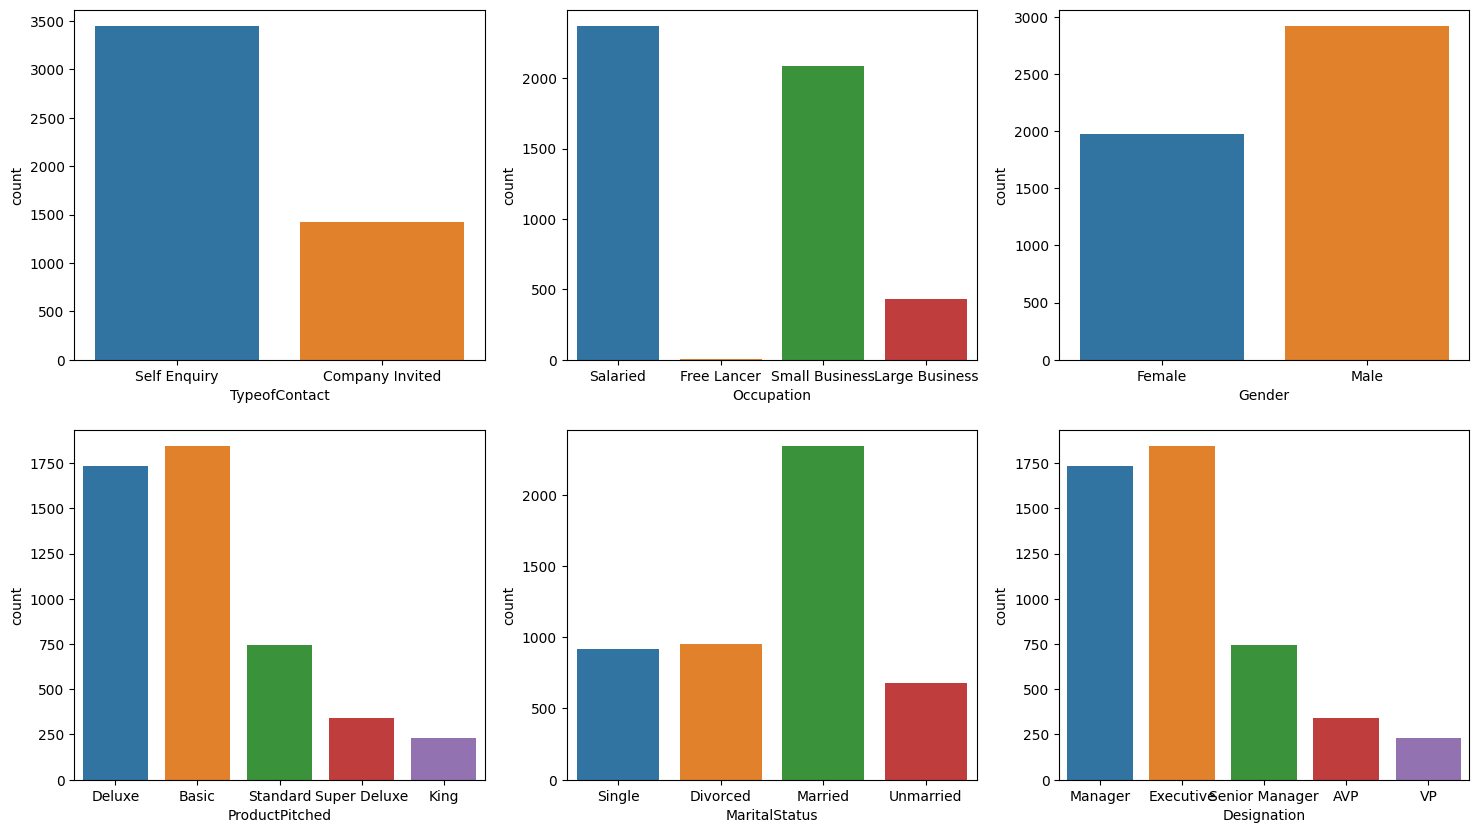

In [517]:
import seaborn as sns
plt.figure(figsize=(18,10))
for i in range(len(categorical)):
    plt.subplot(2,3,i+1)
    sns.countplot(x=data[categorical[i]])

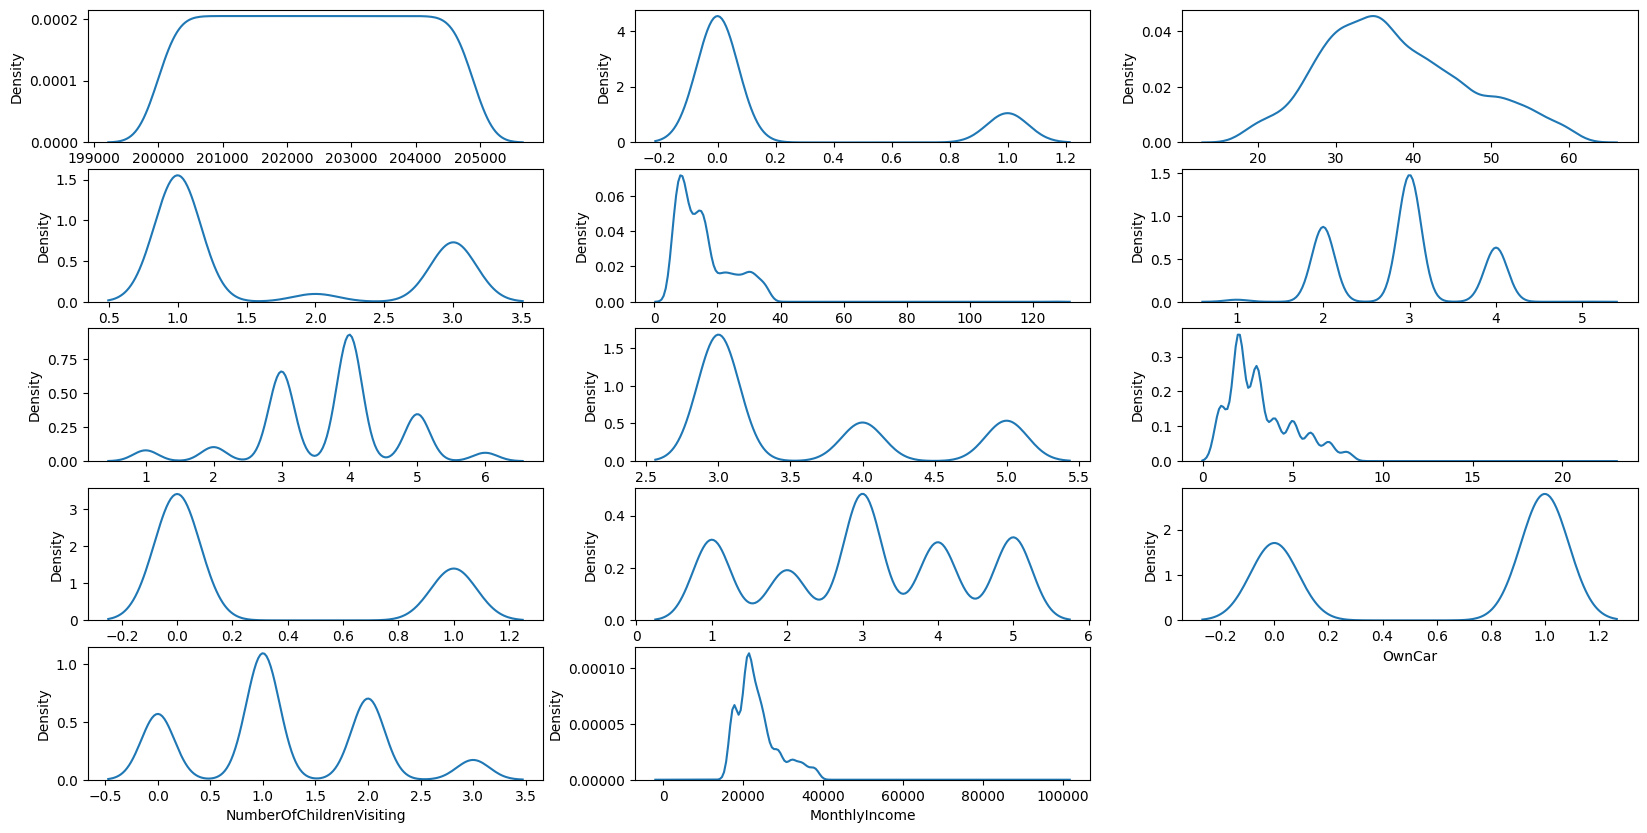

In [518]:
import warnings
warnings.filterwarnings("ignore")
plt.figure(figsize=(20,10))
for i in range(len(numerical)):
    plt.subplot(5,3,i+1)
    sns.kdeplot(x=data[numerical[i]])

In [519]:
numerical_df=data[numerical]
numerical_df.head()

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
0,200000,1,41.0,3,6.0,3,3.0,3.0,1.0,1,2,1,0.0,20993.0
1,200001,0,49.0,1,14.0,3,4.0,4.0,2.0,0,3,1,2.0,20130.0
2,200002,1,37.0,1,8.0,3,4.0,3.0,7.0,1,3,0,0.0,17090.0
3,200003,0,33.0,1,9.0,2,3.0,3.0,2.0,1,5,1,1.0,17909.0
4,200004,0,NaN,1,8.0,2,3.0,4.0,1.0,0,5,1,0.0,18468.0


In [520]:
plt.figure(figsize=(20,20))
numerical_df.iloc[:,1:].corr()

,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
ProdTaken,1.000000,-0.147254,0.086852,0.078257,0.009627,0.112171,0.099577,0.018898,0.260844,0.051394,-0.011508,0.007421,-0.130585
Age,-0.147254,1.000000,-0.015625,-0.012063,0.011621,-0.002577,-0.010474,0.184905,0.033399,0.018510,0.048654,0.007370,0.464869
CityTier,0.086852,-0.015625,1.000000,0.022703,-0.001671,0.023652,-0.009164,-0.029709,0.001793,-0.042160,0.003817,0.000672,0.051817
DurationOfPitch,0.078257,-0.012063,0.022703,1.000000,0.065141,0.009434,-0.006637,0.009715,0.033034,-0.002880,-0.001626,0.031408,-0.006252
NumberOfPersonVisiting,0.009627,0.011621,-0.001671,0.065141,1.000000,0.328569,0.033867,0.195223,0.011177,-0.019581,0.010362,0.610621,0.195134
NumberOfFollowups,0.112171,-0.002577,0.023652,0.009434,0.328569,1.000000,-0.024176,0.139517,0.004970,0.004054,0.012112,0.286425,0.176503
PreferredPropertyStar,0.099577,-0.010474,-0.009164,-0.006637,0.033867,-0.024176,1.000000,0.012115,0.001040,-0.022701,0.015742,0.035798,0.014289
NumberOfTrips,0.018898,0.184905,-0.029709,0.009715,0.195223,0.139517,0.012115,1.000000,0.012949,-0.004378,-0.011825,0.168795,0.139105
Passport,0.260844,0.033399,0.001793,0.033034,0.011177,0.004970,0.001040,0.012949,1.000000,0.002926,-0.022330,0.020264,0.002545
PitchSatisfactionScore,0.051394,0.018510,-0.042160,-0.002880,-0.019581,0.004054,-0.022701,-0.004378,0.002926,1.000000,0.068850,0.000878,0.030421


<Figure size 2000x2000 with 0 Axes>

<Axes: >

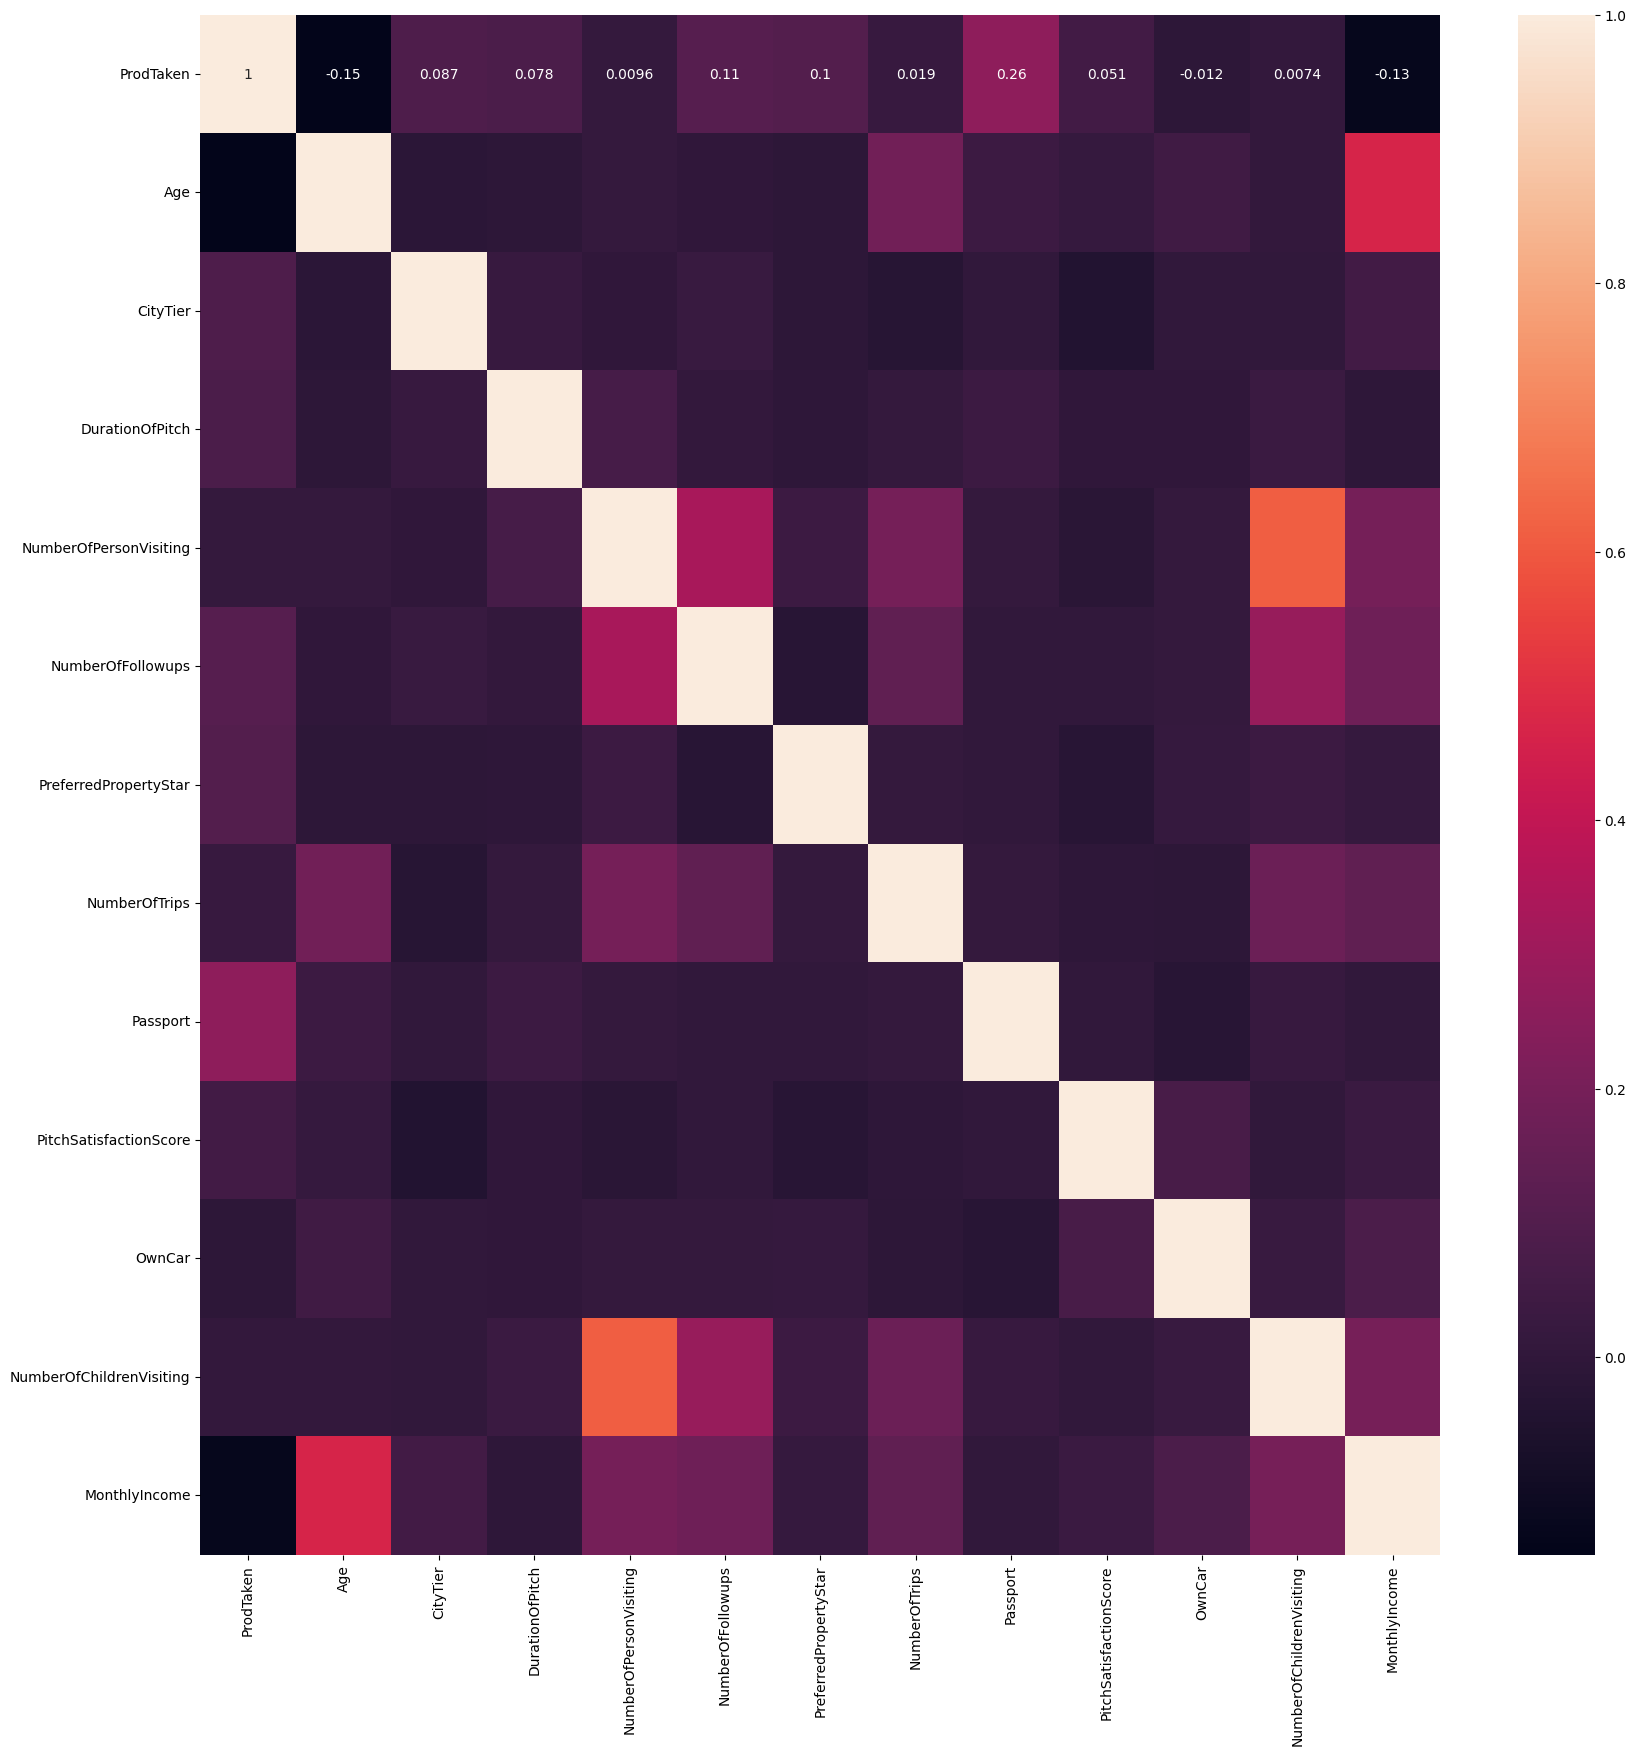

In [521]:
plt.figure(figsize=(20,20))
sns.heatmap(numerical_df.iloc[:,1:].corr(),annot=True)

In [522]:
data["Age"].dtype

dtype('float64')

In [523]:
data.Age=data["Age"].astype(dtype=np.float32)

In [524]:
data["Age"].dtype

dtype('float32')

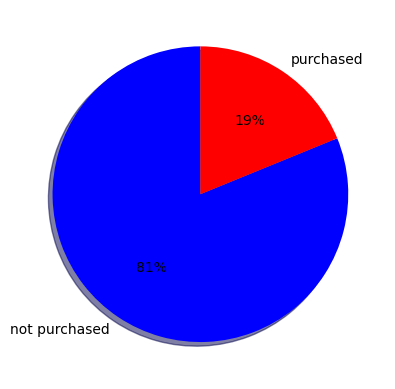

In [525]:
percentage=data.ProdTaken.value_counts()
label=["not purchased","purchased"]
plt.pie(percentage,labels=label,startangle=90,shadow=True,colors=["blue","red"],autopct="%1.0f%%")
plt.show()

In [526]:
categorical

['TypeofContact',
 'Occupation',
 'Gender',
 'ProductPitched',
 'MaritalStatus',
 'Designation']

In [527]:
for i in range(len(categorical)):
    print(pd.crosstab(data.ProdTaken,data[categorical[i]],margins=True))
    print("-"*80)

TypeofContact  Company Invited  Self Enquiry   All
ProdTaken                                         
0                         1109          2837  3946
1                          310           607   917
All                       1419          3444  4863
--------------------------------------------------------------------------------
Occupation  Free Lancer  Large Business  Salaried  Small Business   All
ProdTaken                                                              
0                     0             314      1954            1700  3968
1                     2             120       414             384   920
All                   2             434      2368            2084  4888
--------------------------------------------------------------------------------
Gender     Female  Male   All
ProdTaken                    
0            1630  2338  3968
1             342   578   920
All          1972  2916  4888
-------------------------------------------------------------------------

In [528]:
data.ProdTaken.shape

(4888,)

<Axes: xlabel='Gender', ylabel='count'>

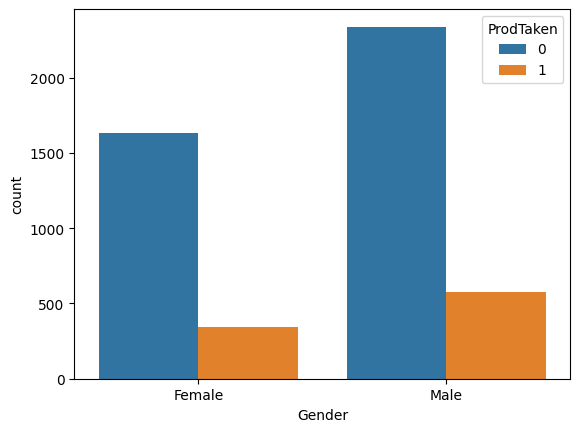

In [529]:
sns.countplot(x=data["Gender"],hue=data["ProdTaken"])

In [530]:
pd.crosstab(data.ProdTaken,data.Gender)

Gender,Female,Male
ProdTaken,,
0,1630,2338
1,342,578


In [531]:
df=data.groupby("MaritalStatus").ProdTaken.value_counts()
df

MaritalStatus  ProdTaken
Divorced       0             826
               1             124
Married        0            2014
               1             326
Single         0             612
               1             304
Unmarried      0             516
               1             166
Name: count, dtype: int64

(array([ 273.,  842., 1268.,  954.,  625.,  436.,  264.]),
 array([18.        , 24.1428566 , 30.2857151 , 36.42856979, 42.57143021,
        48.7142868 , 54.8571434 , 61.        ]),
 <BarContainer object of 7 artists>)

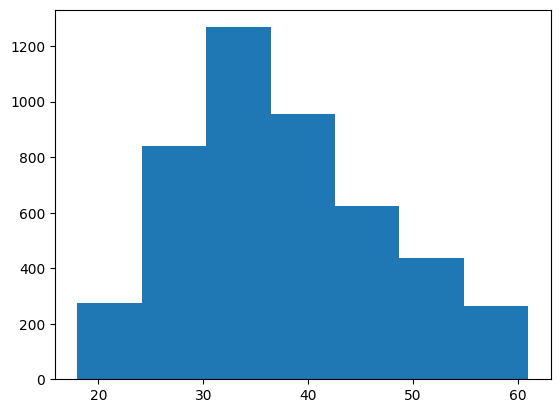

In [532]:
plt.hist(data.Age,bins=7)

Text(0.5, 1.0, 'Marital status and prodTaken count')

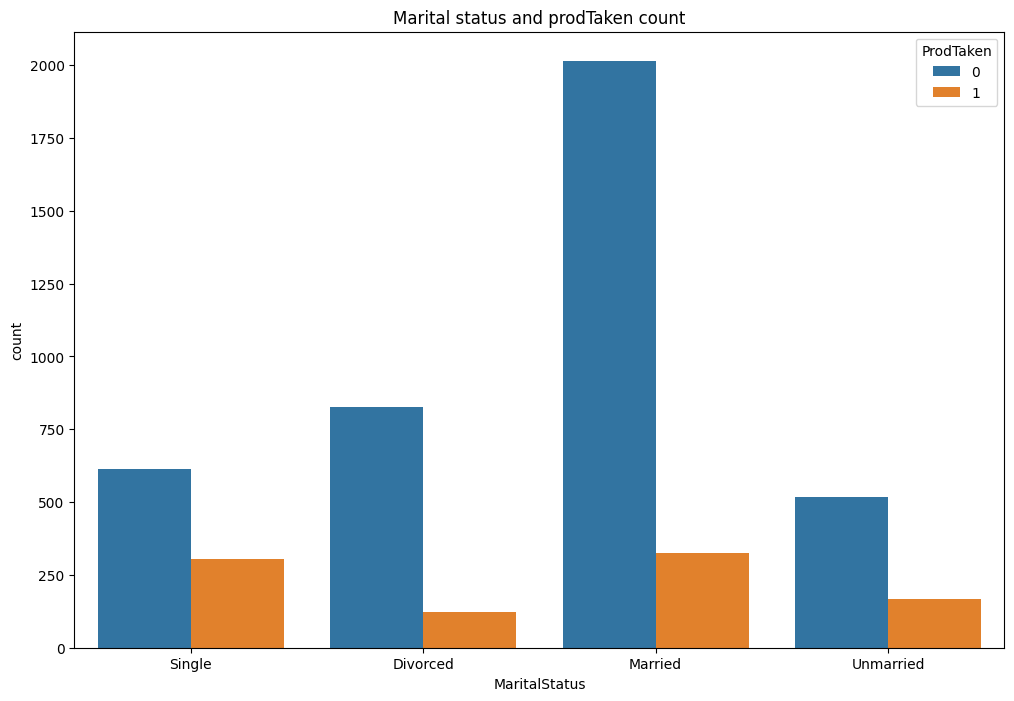

In [533]:
plt.figure(figsize=(12,8))
sns.countplot(x=data["MaritalStatus"],hue=data["ProdTaken"])
plt.title("Marital status and prodTaken count")

<Axes: xlabel='DurationOfPitch', ylabel='count'>

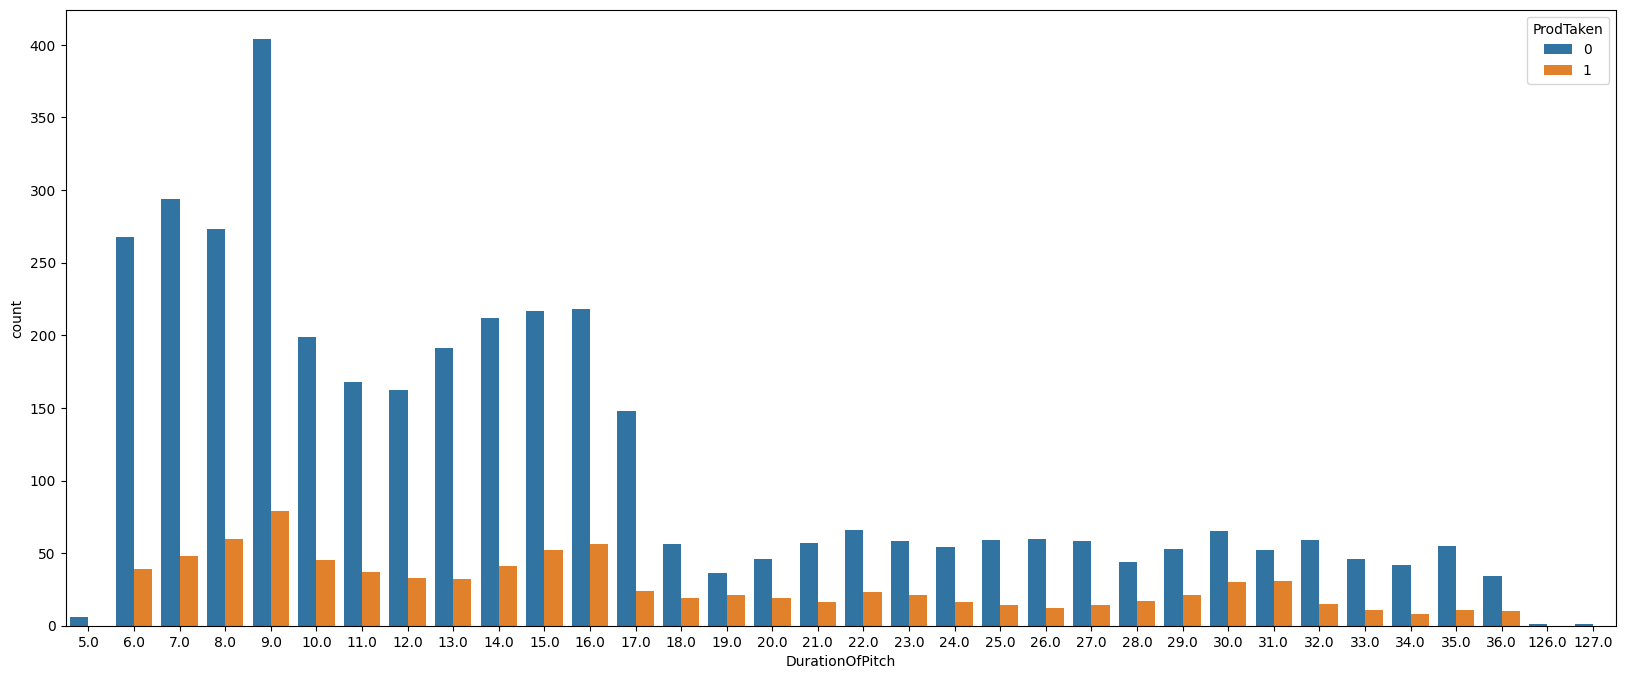

In [534]:
plt.figure(figsize=(20,8))
sns.countplot(x=data["DurationOfPitch"],hue=data["ProdTaken"])

In [535]:
pd.crosstab(data["ProdTaken"],data["DurationOfPitch"],margins=True)

DurationOfPitch,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,...,30.0,31.0,32.0,33.0,34.0,35.0,36.0,126.0,127.0,All
ProdTaken,,,,,,,,,,,,,,,,,,,,,
0,6,268,294,273,404,199,168,162,191,212,...,65,52,59,46,42,55,34,1,1,3762
1,0,39,48,60,79,45,37,33,32,41,...,30,31,15,11,8,11,10,0,0,875
All,6,307,342,333,483,244,205,195,223,253,...,95,83,74,57,50,66,44,1,1,4637


<Axes: xlabel='NumberOfFollowups', ylabel='count'>

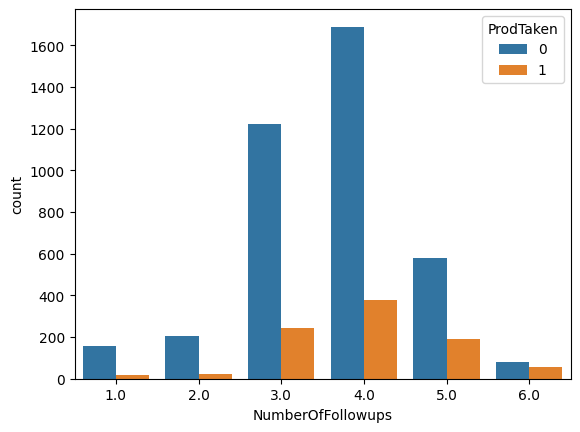

In [536]:
sns.countplot(x=data["NumberOfFollowups"],hue=data["ProdTaken"])

<Axes: xlabel='NumberOfPersonVisiting', ylabel='count'>

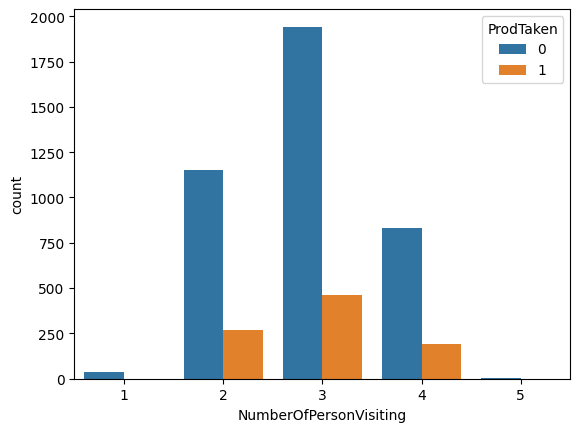

In [537]:
sns.countplot(x=data["NumberOfPersonVisiting"],hue=data["ProdTaken"])

In [538]:
pd.crosstab(data["ProdTaken"],data["NumberOfPersonVisiting"],margins=True)

NumberOfPersonVisiting,1,2,3,4,5,All
ProdTaken,,,,,,
0,39,1151,1942,833,3,3968
1,0,267,460,193,0,920
All,39,1418,2402,1026,3,4888


In [539]:
data.describe()

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
count,4888.000000,4888.000000,4662.000000,4888.000000,4637.000000,4888.000000,4843.000000,4862.000000,4748.000000,4888.000000,4888.000000,4888.000000,4822.000000,4655.000000
mean,202443.500000,0.188216,37.622265,1.654255,15.490835,2.905074,3.708445,3.581037,3.236521,0.290917,3.078151,0.620295,1.187267,23619.853491
std,1411.188388,0.390925,9.316381,0.916583,8.519643,0.724891,1.002509,0.798009,1.849019,0.454232,1.365792,0.485363,0.857861,5380.698361
min,200000.000000,0.000000,18.000000,1.000000,5.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1000.000000
25%,201221.750000,0.000000,31.000000,1.000000,9.000000,2.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,20346.000000
50%,202443.500000,0.000000,36.000000,1.000000,13.000000,3.000000,4.000000,3.000000,3.000000,0.000000,3.000000,1.000000,1.000000,22347.000000
75%,203665.250000,0.000000,44.000000,3.000000,20.000000,3.000000,4.000000,4.000000,4.000000,1.000000,4.000000,1.000000,2.000000,25571.000000
max,204887.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,5.000000,1.000000,3.000000,98678.000000


In [540]:
bins=[10,20,50,61]
labels=["Teen","Adult","Senior"]
data["Agegroup"]=pd.cut(data["Age"],bins=bins,labels=labels,right=False)
pd.crosstab(data.ProdTaken,data.Agegroup,margins=True)

Agegroup,Teen,Adult,Senior,All
ProdTaken,,,,
0,17,3235,525,3777
1,29,746,101,876
All,46,3981,626,4653


Text(0, 0.5, 'purchase')

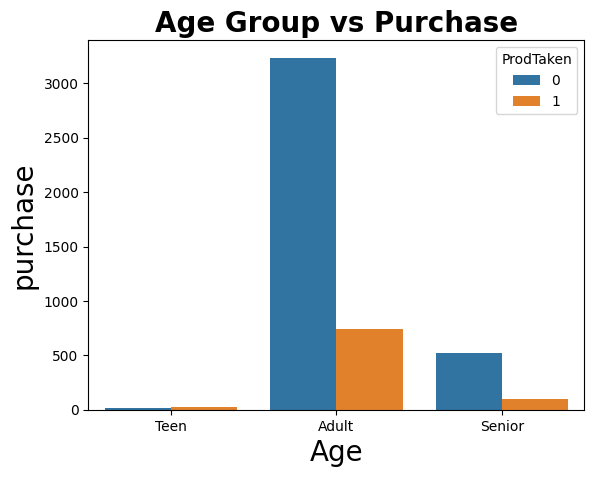

In [541]:
sns.countplot(x=data.Agegroup,hue=data.ProdTaken)
plt.title("Age Group vs Purchase",weight="bold",fontsize="20")
plt.xlabel("Age",weight="light",fontsize="20")
plt.ylabel("purchase",weight="light",fontsize="20")

### Reports

- The **adult group** has the highest share of purchases.  
- The **age group 20–50 years** contributes the most to purchases.

<Axes: xlabel='MaritalStatus', ylabel='count'>

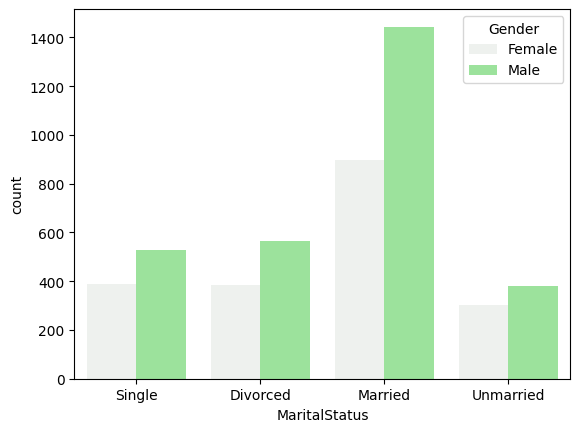

In [542]:
sns.countplot(x=data["MaritalStatus"],hue=data["Gender"],color="lightgreen")

In [543]:
pd.crosstab(data.Gender,data.MaritalStatus,margins=True)

MaritalStatus,Divorced,Married,Single,Unmarried,All
Gender,,,,,
Female,386,896,387,303,1972
Male,564,1444,529,379,2916
All,950,2340,916,682,4888


In [544]:
df=data.groupby("DurationOfPitch")["ProdTaken"].value_counts()
bins=[5,6,16,31,127]
labels=["5 min","6-16 min","16-31 min","greater than 31 min"]
data["pitch"]=pd.cut(data.DurationOfPitch,bins=bins,labels=labels,right=False)
pd.crosstab(data.ProdTaken,data.pitch,margins=True)

pitch,5 min,6-16 min,16-31 min,greater than 31 min,All
ProdTaken,,,,,
0,6,2388,1078,289,3761
1,0,466,323,86,875
All,6,2854,1401,375,4636


<Axes: xlabel='pitch', ylabel='count'>

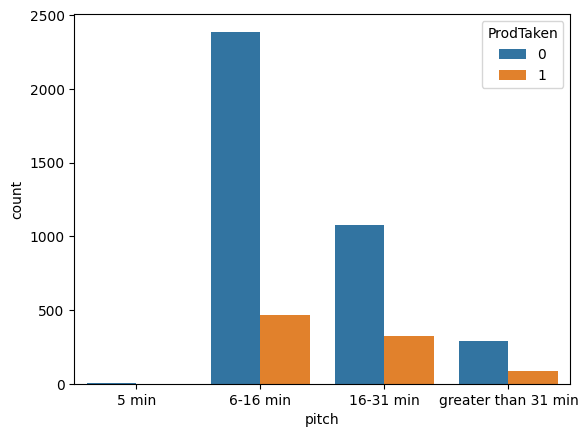

In [545]:
sns.countplot(x=data.pitch,hue=data.ProdTaken)

In [546]:
data.pitch.value_counts(normalize=True)

pitch
6-16 min               0.615617
16-31 min              0.302200
greater than 31 min    0.080889
5 min                  0.001294
Name: proportion, dtype: float64

#### Reports
- The pitch duration of *6-31 min* has the 89% share of purchases data
- The maximun number of packages are purchased in this *6-31 min* pitch duration range

(4.0, 40.0)

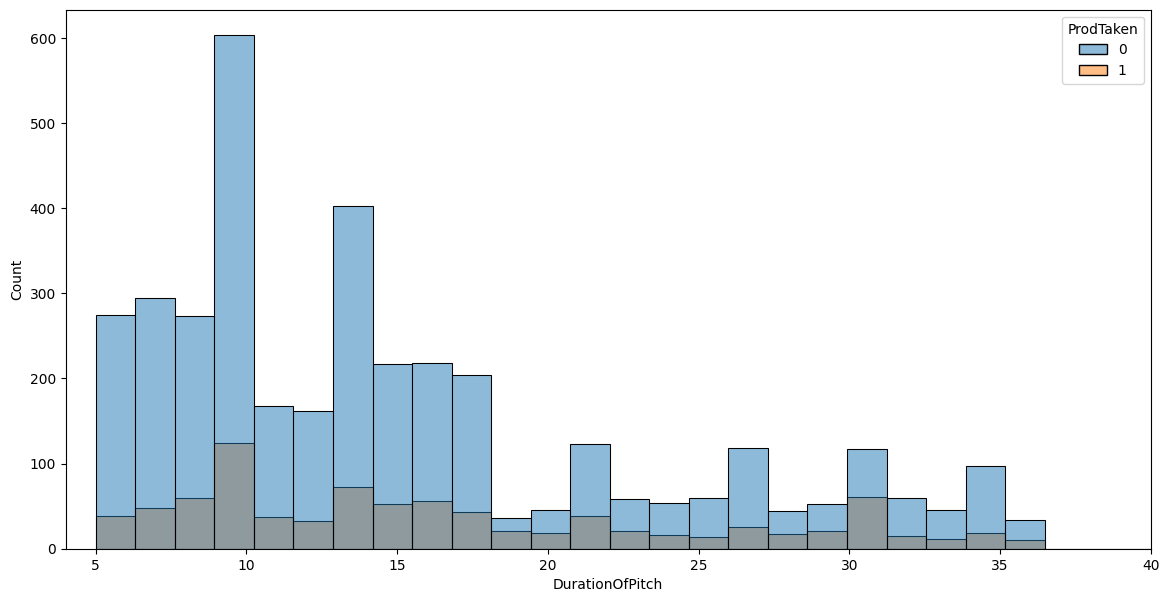

In [547]:
plt.figure(figsize=(14,7))
sns.histplot(x=data.DurationOfPitch,hue=data.ProdTaken)
plt.xlim((4,40))

Text(0.5, 1.0, 'NumberOfFollowups Vs Product taken')

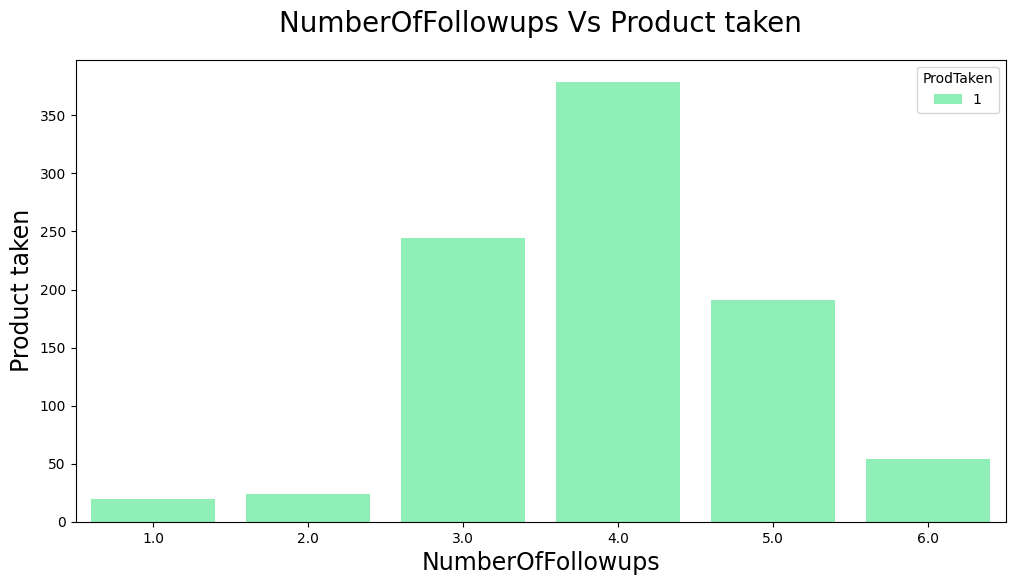

In [548]:
plt.figure(figsize=(12,6))
data1=data[data.ProdTaken==1]
sns.countplot(x=data1.NumberOfFollowups,hue=data1.ProdTaken,palette="rainbow_r")
plt.ylabel("Product taken",fontsize=17)
plt.xlabel("NumberOfFollowups",fontsize=17)
plt.title("NumberOfFollowups Vs Product taken",fontsize=20,pad=20)

In [549]:
for i in range(1,7):
    no=data[(data.NumberOfFollowups==i) & (data.ProdTaken==1)].shape[0]
no

54

In [550]:
for i in range(1,7):
    no_of_follows_purchased=data[(data.NumberOfFollowups==i) & (data.ProdTaken==1)].shape[0]
    no_of_followers_total=data[data.NumberOfFollowups==i].shape[0]
    conversion_ratio=no_of_follows_purchased/no_of_followers_total
    print(f"for {i} number of followups Out of {no_of_followers_total} the conversion rate is {conversion_ratio*100}")

for 1 number of followups Out of 176 the conversion rate is 11.363636363636363
for 2 number of followups Out of 229 the conversion rate is 10.480349344978166
for 3 number of followups Out of 1466 the conversion rate is 16.64392905866303
for 4 number of followups Out of 2068 the conversion rate is 18.32688588007737
for 5 number of followups Out of 768 the conversion rate is 24.869791666666664
for 6 number of followups Out of 136 the conversion rate is 39.705882352941174


### Report 
- **6** number of followups have very few inquiries but the highest conversion conversion rate 
- *2* number of followups people are bit confused and hence has less purchase

In [551]:
pd.crosstab(data.ProdTaken,data.NumberOfFollowups,margins=True)

NumberOfFollowups,1.0,2.0,3.0,4.0,5.0,6.0,All
ProdTaken,,,,,,,
0,156,205,1222,1689,577,82,3931
1,20,24,244,379,191,54,912
All,176,229,1466,2068,768,136,4843


<Axes: xlabel='CityTier', ylabel='count'>

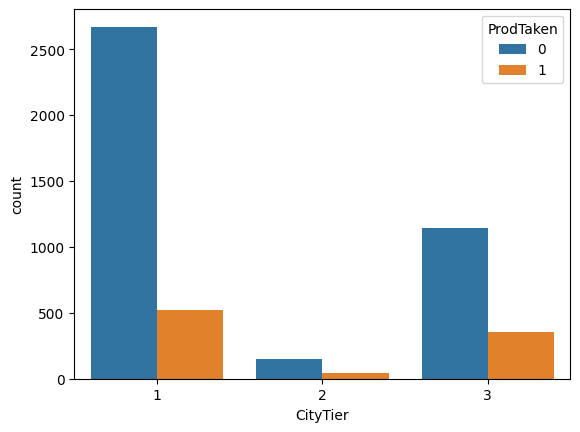

In [552]:
sns.countplot(x=data.CityTier, hue=data.ProdTaken)

In [553]:
pd.crosstab(data.ProdTaken,data.CityTier,margins=True)

CityTier,1,2,3,All
ProdTaken,,,,
0,2670,152,1146,3968
1,520,46,354,920
All,3190,198,1500,4888


In [554]:
for i in range(1,4):
    no_city_purchased=data[(data.CityTier==i) & (data.ProdTaken==1)].shape[0]
    no_city_total=data[(data.CityTier==i)].shape[0]
    convert_rate=no_city_purchased/no_city_total
    print(f"City tier {i}:\n"
        f"{no_city_total} people and the conversion rate is {convert_rate*100}\n"
          f"People purchasing : {no_city_purchased}")

City tier 1:
3190 people and the conversion rate is 16.30094043887147
People purchasing : 520
City tier 2:
198 people and the conversion rate is 23.232323232323232
People purchasing : 46
City tier 3:
1500 people and the conversion rate is 23.599999999999998
People purchasing : 354


### Report
- City tier 1 has the highest share in customers but their converion rate is **16.3%**.
- City tier 3 has 2nd highest share in customer and their conversion rate is the highest **23.6%**.

<Axes: xlabel='Occupation', ylabel='count'>

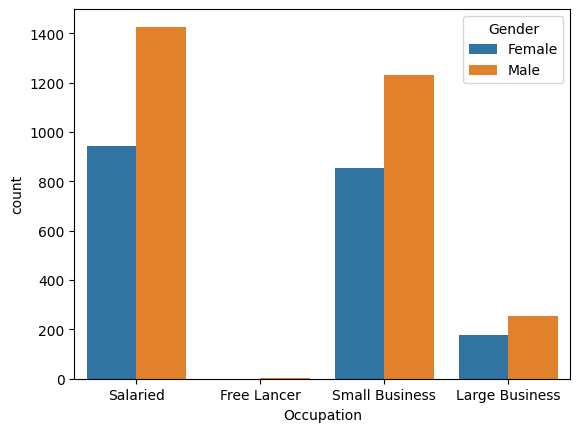

In [555]:
sns.countplot(x=data.Occupation,hue=data.Gender)

<Axes: xlabel='Occupation', ylabel='Count'>

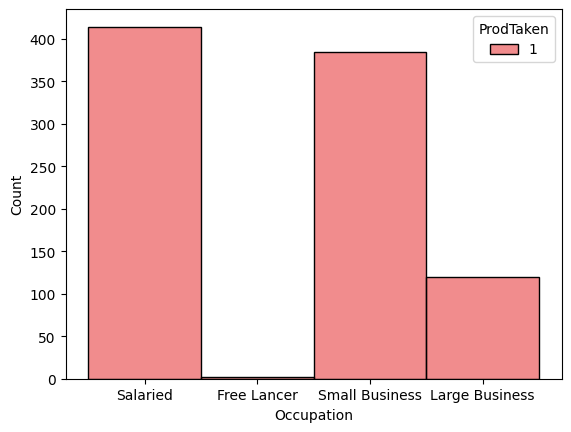

In [556]:
sns.histplot(x=data1.Occupation,hue=data1.ProdTaken,palette="Set1",ec="black")

In [557]:
pd.crosstab(data.Occupation,[data.Gender,data.ProdTaken],margins=True)

Gender         Female       Male        All
ProdTaken           0    1     0    1      
Occupation                                 
Free Lancer         0    0     0    2     2
Large Business    138   40   176   80   434
Salaried          774  168  1180  246  2368
Small Business    718  134   982  250  2084
All              1630  342  2338  578  4888

<Axes: xlabel='ProductPitched', ylabel='count'>

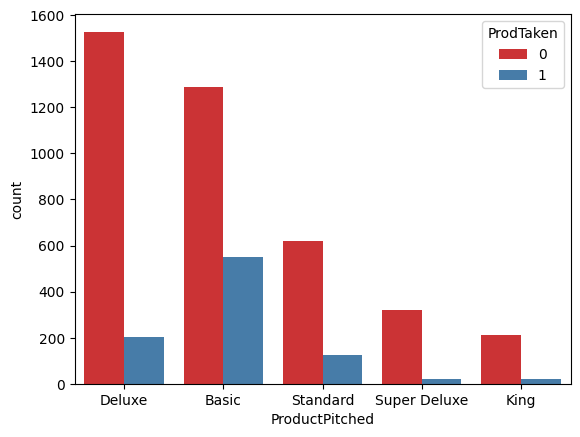

In [558]:
sns.countplot(x=data.ProductPitched,hue=data.ProdTaken,palette="Set1")

In [559]:
data.groupby("ProductPitched")["ProdTaken"].value_counts()

ProductPitched  ProdTaken
Basic           0            1290
                1             552
Deluxe          0            1528
                1             204
King            0             210
                1              20
Standard        0             618
                1             124
Super Deluxe    0             322
                1              20
Name: count, dtype: int64

In [560]:
pd.crosstab(data.ProdTaken,data.ProductPitched,margins=True)

ProductPitched,Basic,Deluxe,King,Standard,Super Deluxe,All
ProdTaken,,,,,,
0,1290,1528,210,618,322,3968
1,552,204,20,124,20,920
All,1842,1732,230,742,342,4888


### Report 
- #### **Deluxe** is the second most pitched product and if we reduce the cost of the package, will get us more successful sales pitch.

In [561]:
data.isna().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
Agegroup                    235
pitch                       252
dtype: int64

<Axes: xlabel='PreferredPropertyStar', ylabel='count'>

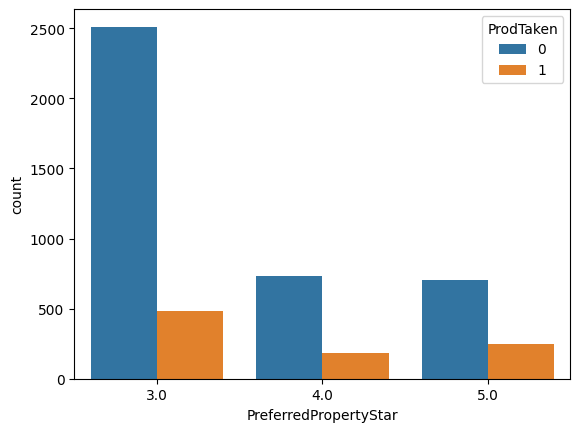

In [562]:
sns.countplot(x=data.PreferredPropertyStar,hue=data.ProdTaken)

In [563]:
print(data.groupby("PreferredPropertyStar")["ProdTaken"].value_counts(normalize=True))
print(pd.crosstab(data.ProdTaken,data.PreferredPropertyStar,margins=True))

PreferredPropertyStar  ProdTaken
3.0                    0            0.838958
                       1            0.161042
4.0                    0            0.800657
                       1            0.199343
5.0                    0            0.738494
                       1            0.261506
Name: proportion, dtype: float64
PreferredPropertyStar   3.0  4.0  5.0   All
ProdTaken                                  
0                      2511  731  706  3948
1                       482  182  250   914
All                    2993  913  956  4862


In [564]:
956/4862

0.19662690250925546

### Report 
- 3 star property is pitched the most but is purchased by only 16% of the people
- 5 star property is pitched to 19.66% of the people and 26.15% has purchased the packages

Text(0, 0.5, 'Passport purchased')

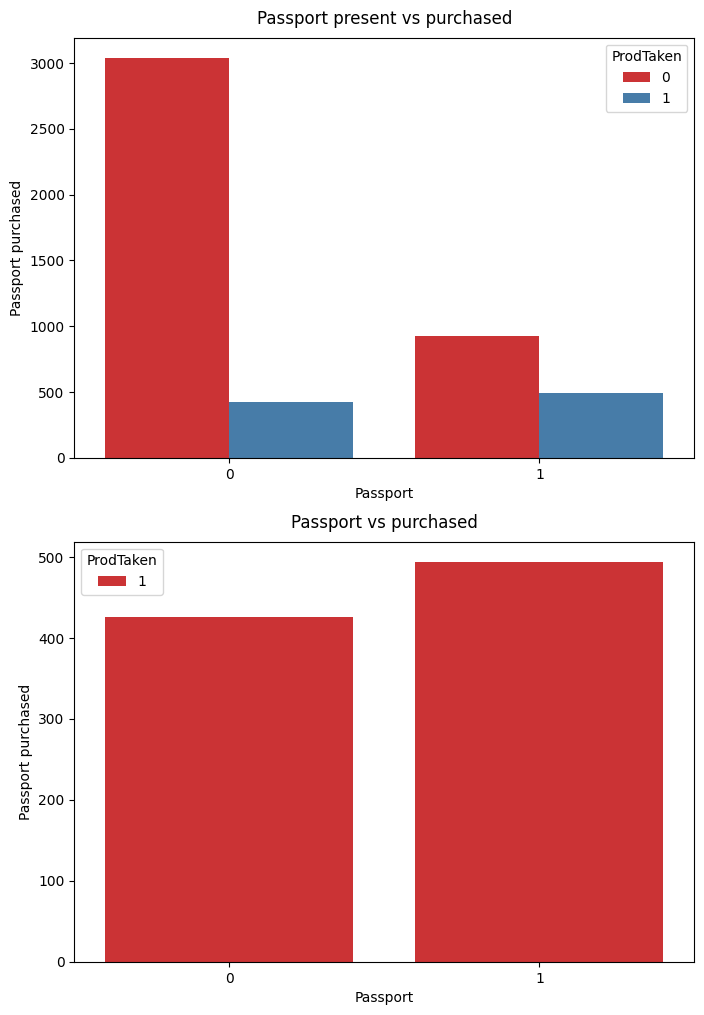

In [565]:
plt.figure(figsize=(8,12))
plt.subplot(2,1,1)
sns.countplot(x=data.Passport,hue=data.ProdTaken,palette="Set1")
plt.title("Passport present vs purchased",pad=10)
plt.ylabel("Passport purchased")
plt.subplot(2,1,2)
sns.countplot(x=data1.Passport,hue=data1.ProdTaken,palette="Set1")
plt.title("Passport vs purchased",pad=10)
plt.ylabel("Passport purchased")

In [566]:
data.groupby("Passport")["ProdTaken"].value_counts(normalize=True)

Passport  ProdTaken
0         0            0.877092
          1            0.122908
1         0            0.652602
          1            0.347398
Name: proportion, dtype: float64

### Report 
- People with no passport have more share, but their purchase is ***12.3%***.
- People with passport are less but, have a purchase of **34.74%**.

<Axes: xlabel='NumberOfTrips', ylabel='count'>

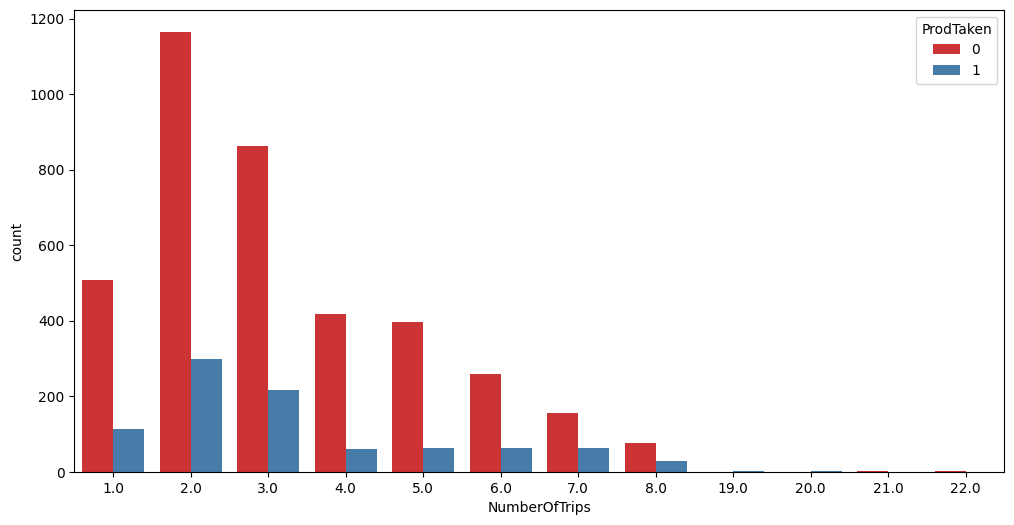

In [567]:
plt.figure(figsize=(12,6))
sns.countplot(x=data.NumberOfTrips,hue=data.ProdTaken,palette="Set1")

In [568]:
data.groupby("NumberOfTrips")["ProdTaken"].value_counts(normalize=True)

NumberOfTrips  ProdTaken
1.0            0            0.819355
               1            0.180645
2.0            0            0.795765
               1            0.204235
3.0            0            0.798888
               1            0.201112
4.0            0            0.872385
               1            0.127615
5.0            0            0.864629
               1            0.135371
6.0            0            0.801242
               1            0.198758
7.0            0            0.715596
               1            0.284404
8.0            0            0.723810
               1            0.276190
19.0           1            1.000000
20.0           1            1.000000
21.0           0            1.000000
22.0           0            1.000000
Name: proportion, dtype: float64

In [569]:
pd.crosstab(data.ProdTaken,data.NumberOfTrips,margins=True)

NumberOfTrips,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,19.0,20.0,21.0,22.0,All
ProdTaken,,,,,,,,,,,,,
0,508,1165,862,417,396,258,156,76,0,0,1,1,3840
1,112,299,217,61,62,64,62,29,1,1,0,0,908
All,620,1464,1079,478,458,322,218,105,1,1,1,1,4748


In [570]:
#for checking relevance of categorical variable with the target feature
from scipy.stats import chi2_contingency
for i in range(len(categorical)):
    contingency=pd.crosstab(data[categorical[i]],data.ProdTaken)
    chi2,p,dof,expected=chi2_contingency(contingency)
    alpha=0.05
    if p < alpha:
        print(f"For {categorical[i]} Reject Null Hypothesis: Feature and Target are dependent (associated).")
    else:
        print(f"For {categorical[i]} Fail to Reject Null Hypothesis: No significant association.")

For TypeofContact Reject Null Hypothesis: Feature and Target are dependent (associated).
For Occupation Reject Null Hypothesis: Feature and Target are dependent (associated).
For Gender Reject Null Hypothesis: Feature and Target are dependent (associated).
For ProductPitched Reject Null Hypothesis: Feature and Target are dependent (associated).
For MaritalStatus Reject Null Hypothesis: Feature and Target are dependent (associated).
For Designation Reject Null Hypothesis: Feature and Target are dependent (associated).


In [571]:
data.isna().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
Agegroup                    235
pitch                       252
dtype: int64

### Report
- 2-3 Followups have maximum number of share and accounts for 56.82% purchase out of the total followups.

In [572]:
data.MonthlyIncome.unique().shape

(2476,)

In [573]:
data.shape

(4888, 22)

In [574]:
data.drop(["Agegroup","pitch"],axis=1,inplace=True)
data.shape

(4888, 20)

In [575]:
data2=data.loc[:,data.isna().sum()>1]
data2.describe()

,Age,DurationOfPitch,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,NumberOfChildrenVisiting,MonthlyIncome
count,4662.000000,4637.000000,4843.000000,4862.000000,4748.000000,4822.000000,4655.000000
mean,37.622265,15.490835,3.708445,3.581037,3.236521,1.187267,23619.853491
std,9.316381,8.519643,1.002509,0.798009,1.849019,0.857861,5380.698361
min,18.000000,5.000000,1.000000,3.000000,1.000000,0.000000,1000.000000
25%,31.000000,9.000000,3.000000,3.000000,2.000000,1.000000,20346.000000
50%,36.000000,13.000000,4.000000,3.000000,3.000000,1.000000,22347.000000
75%,44.000000,20.000000,4.000000,4.000000,4.000000,2.000000,25571.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,3.000000,98678.000000


In [576]:
data.TypeofContact.value_counts()

TypeofContact
Self Enquiry       3444
Company Invited    1419
Name: count, dtype: int64

- impute Age with mean
- impute DurationOf Pitch with mean
- impute NumberOfFollowups with median as it is a discrete feature
- impute PreferredPropertyStar with median 
- impute NumberOfTrips with median 
- impute NumberOfChildrenVisiting with median 
- impute MonthlyIncome with mean
- impute TyprofConatct with mode

## Missing values

In [577]:
from sklearn.impute import SimpleImputer
impute1=SimpleImputer(strategy="mean")
impute2=SimpleImputer(strategy="median")
impute3=SimpleImputer(strategy="most_frequent")
data.loc[:,["Age","DurationOfPitch","MonthlyIncome"]]=impute1.fit_transform(data.loc[:,["Age","DurationOfPitch","MonthlyIncome"]])
data.loc[:,["NumberOfFollowups","PreferredPropertyStar","NumberOfTrips","NumberOfChildrenVisiting"]]=impute2.fit_transform(data.loc[:,["NumberOfFollowups","PreferredPropertyStar","NumberOfTrips","NumberOfChildrenVisiting"]])
data.loc[:,["TypeofContact"]]=impute3.fit_transform(data.loc[:,["TypeofContact"]])

In [578]:
data.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.000000,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.000000,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.000000,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.000000,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,37.622265,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [579]:
data.isna().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

In [580]:
data.duplicated().sum()

0

In [581]:
data.drop("CustomerID",axis=1,inplace=True)
data.shape

(4888, 19)

In [582]:
data["TotalPersonVisiting"]=data.NumberOfPersonVisiting+data.NumberOfChildrenVisiting
data.shape

(4888, 20)

In [583]:
data.drop(["NumberOfPersonVisiting","NumberOfChildrenVisiting"],axis=1,inplace=True)
data.shape

(4888, 18)

In [584]:
numerical1=[feature for feature in data.columns if data[feature].dtype!="O"]
numerical1


['ProdTaken',
 'Age',
 'CityTier',
 'DurationOfPitch',
 'NumberOfFollowups',
 'PreferredPropertyStar',
 'NumberOfTrips',
 'Passport',
 'PitchSatisfactionScore',
 'OwnCar',
 'MonthlyIncome',
 'TotalPersonVisiting']

In [585]:
num=numerical1[1:]
num[0],len(num)

('Age', 11)

<Axes: ylabel='CityTier'>

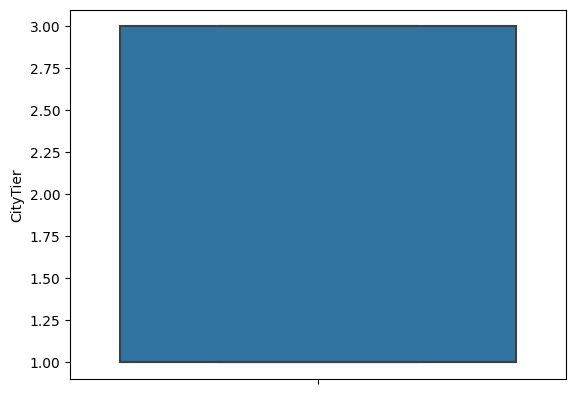

In [586]:
sns.boxplot(y=data.CityTier)

In [587]:
# fig,axs=plt.subplots(4,3,figsize=(15,20))
# i=0
# for j in range(4):
#     for k in range(3):
#         axs[j][k].boxplot(data[num[i]])
#         axs[j][k].set_xlabel(num[i])
#         i=i+1

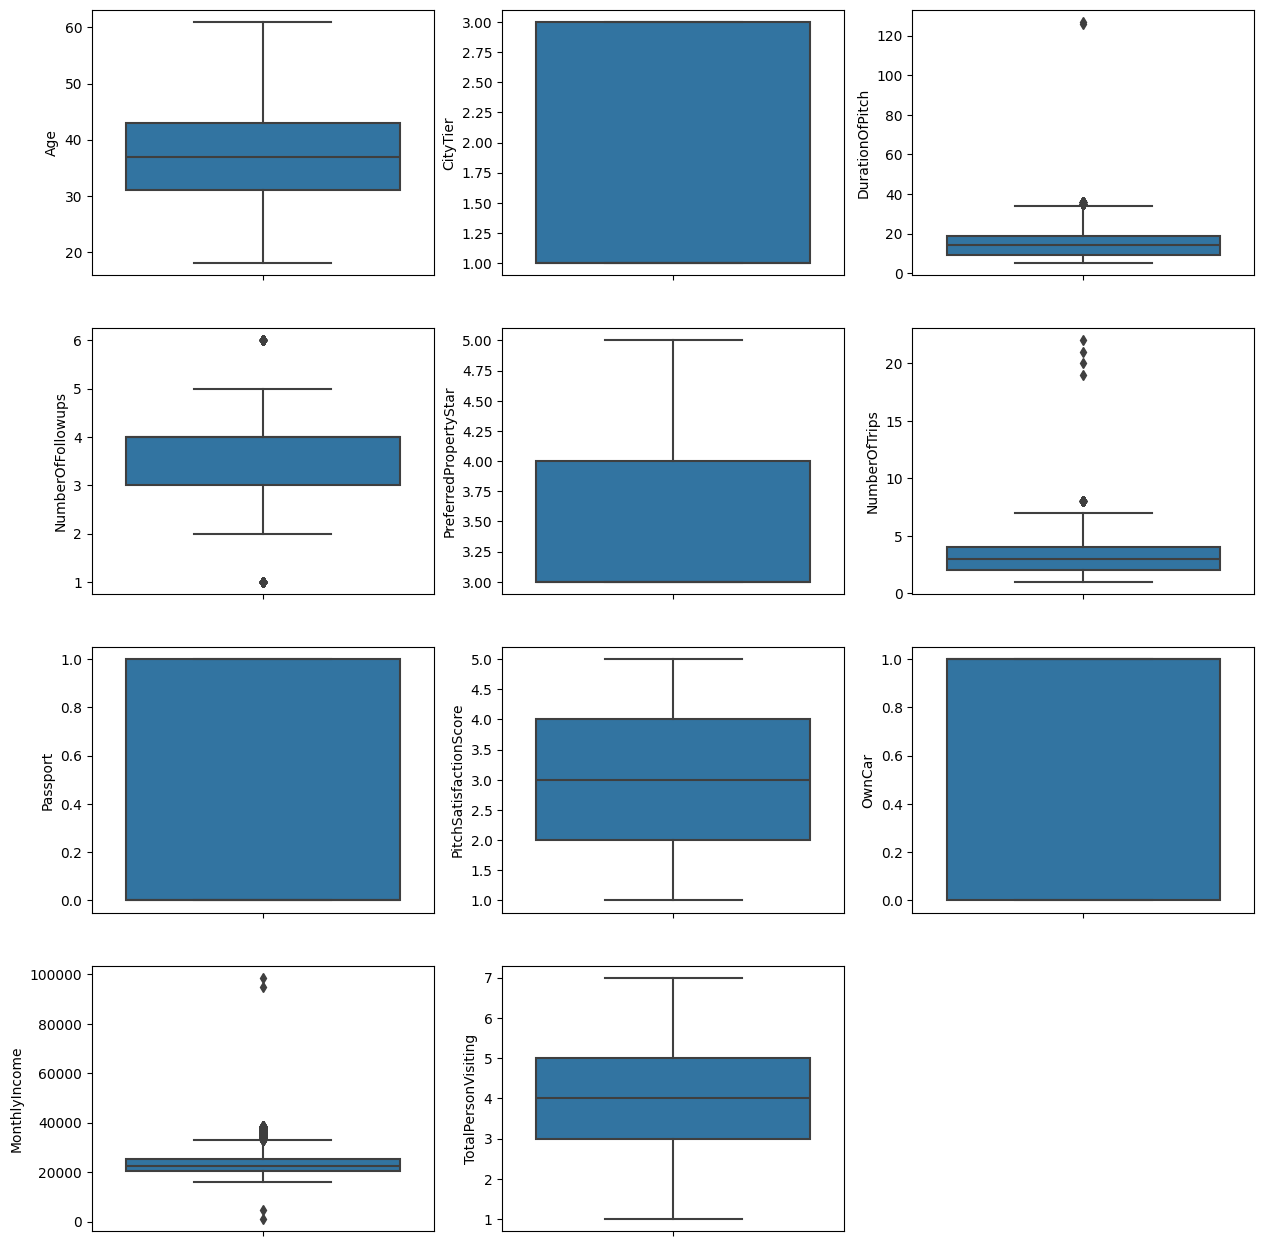

In [588]:
plt.figure(figsize=(15,20))
for i in range(len(num)):
    plt.subplot(5,3,i+1)
    sns.boxplot(y=data[num[i]])

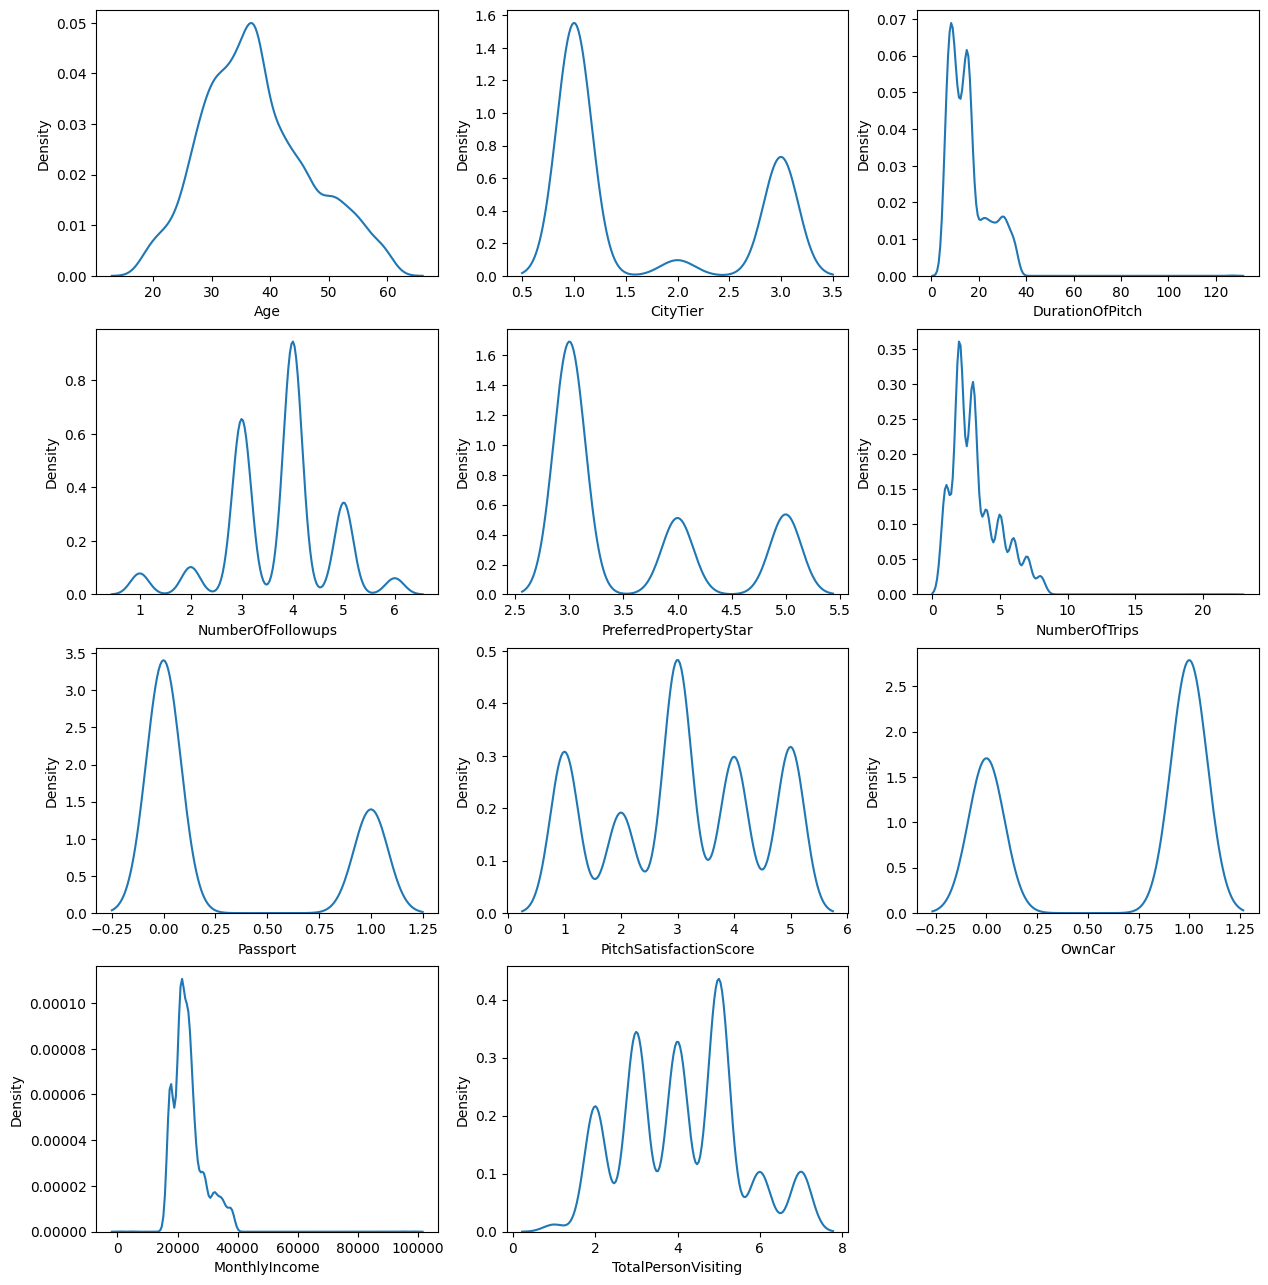

In [589]:
#to see skewness and outliers 
plt.figure(figsize=(15,20))
for i in range(len(num)):
    plt.subplot(5,3,i+1)
    sns.kdeplot(data[num[i]])

In [590]:
#skewness of data
data[num].skew()

Age                       0.392156
CityTier                  0.736531
DurationOfPitch           1.798801
NumberOfFollowups        -0.381849
PreferredPropertyStar     0.903725
NumberOfTrips             1.485204
Passport                  0.920980
PitchSatisfactionScore   -0.127726
OwnCar                   -0.495892
MonthlyIncome             1.997315
TotalPersonVisiting       0.186749
dtype: float64

In [591]:
data.describe()

,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,MonthlyIncome,TotalPersonVisiting
count,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000
mean,0.188216,37.622265,1.654255,15.490835,3.711129,3.577946,3.229746,0.290917,3.078151,0.620295,23619.853491,4.089812
std,0.390925,9.098418,0.916583,8.297971,0.998271,0.797005,1.822769,0.454232,1.365792,0.485363,5250.862747,1.414617
min,0.000000,18.000000,1.000000,5.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,1000.000000,1.000000
25%,0.000000,31.000000,1.000000,9.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,20485.000000,3.000000
50%,0.000000,37.000000,1.000000,14.000000,4.000000,3.000000,3.000000,0.000000,3.000000,1.000000,22655.000000,4.000000
75%,0.000000,43.000000,3.000000,19.000000,4.000000,4.000000,4.000000,1.000000,4.000000,1.000000,25424.750000,5.000000
max,1.000000,61.000000,3.000000,127.000000,6.000000,5.000000,22.000000,1.000000,5.000000,1.000000,98678.000000,7.000000


In [592]:
data.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,TotalPersonVisiting
0,1,41.000000,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Single,1.0,1,2,1,Manager,20993.0,3.0
1,0,49.000000,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,1,37.000000,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Single,7.0,1,3,0,Executive,17090.0,3.0
3,0,33.000000,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
4,0,37.622265,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,2.0


In [593]:
data.shape

(4888, 18)

In [594]:
data.Age[0]

41.0

In [595]:
def a(col):
    print(data[col][0])
    print(data[col].quantile(0.25))
a("Age")

41.0
31.0


In [596]:
num1=numerical1[1:]
num1
for i in num1:
    print(f"{i}")

Age
CityTier
DurationOfPitch
NumberOfFollowups
PreferredPropertyStar
NumberOfTrips
Passport
PitchSatisfactionScore
OwnCar
MonthlyIncome
TotalPersonVisiting


In [597]:
def remove_outliers(database, col):
    
    q1 = database[col].quantile(0.25)
    q3 = database[col].quantile(0.75)
    iqr = q3 - q1
    
    lower_limit = q1 - 1.5 * iqr
    upper_limit = q3 + 1.5 * iqr
    
    filtered_data = database[(database[col] >= lower_limit) & (database[col] <= upper_limit)]
    
    return filtered_data

for i in num1:
    data=remove_outliers(data,i)
data.shape

(4032, 18)

In [598]:
data.columns

Index(['ProdTaken', 'Age', 'TypeofContact', 'CityTier', 'DurationOfPitch',
       'Occupation', 'Gender', 'NumberOfFollowups', 'ProductPitched',
       'PreferredPropertyStar', 'MaritalStatus', 'NumberOfTrips', 'Passport',
       'PitchSatisfactionScore', 'OwnCar', 'Designation', 'MonthlyIncome',
       'TotalPersonVisiting'],
      dtype='object')

In [599]:
numerical2=[features for features in data.columns if data[features].dtype!="O"][1:]
numerical2

['Age',
 'CityTier',
 'DurationOfPitch',
 'NumberOfFollowups',
 'PreferredPropertyStar',
 'NumberOfTrips',
 'Passport',
 'PitchSatisfactionScore',
 'OwnCar',
 'MonthlyIncome',
 'TotalPersonVisiting']

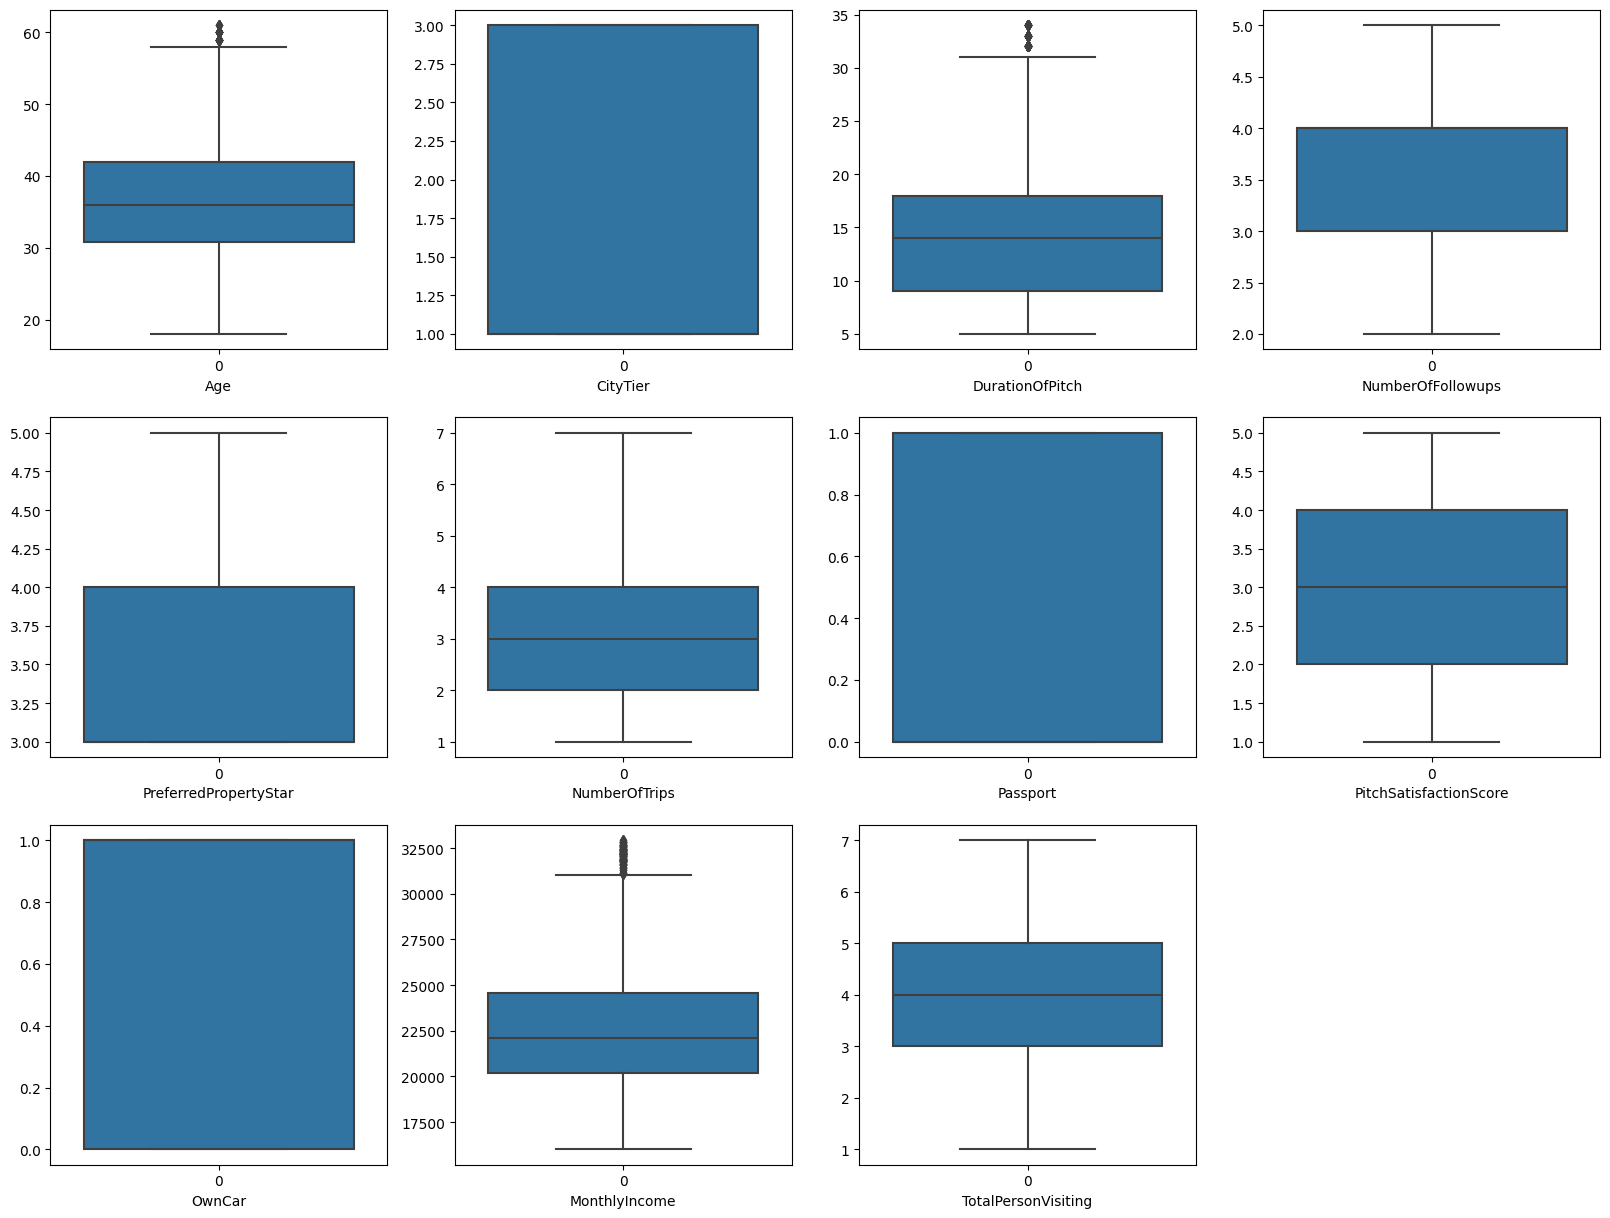

In [600]:
plt.figure(figsize=(20,15))
for i in range(len(numerical2)):
    plt.subplot(3,4,i+1)
    sns.boxplot(data[numerical2[i]])
    plt.xlabel(numerical2[i])
    i=i+1

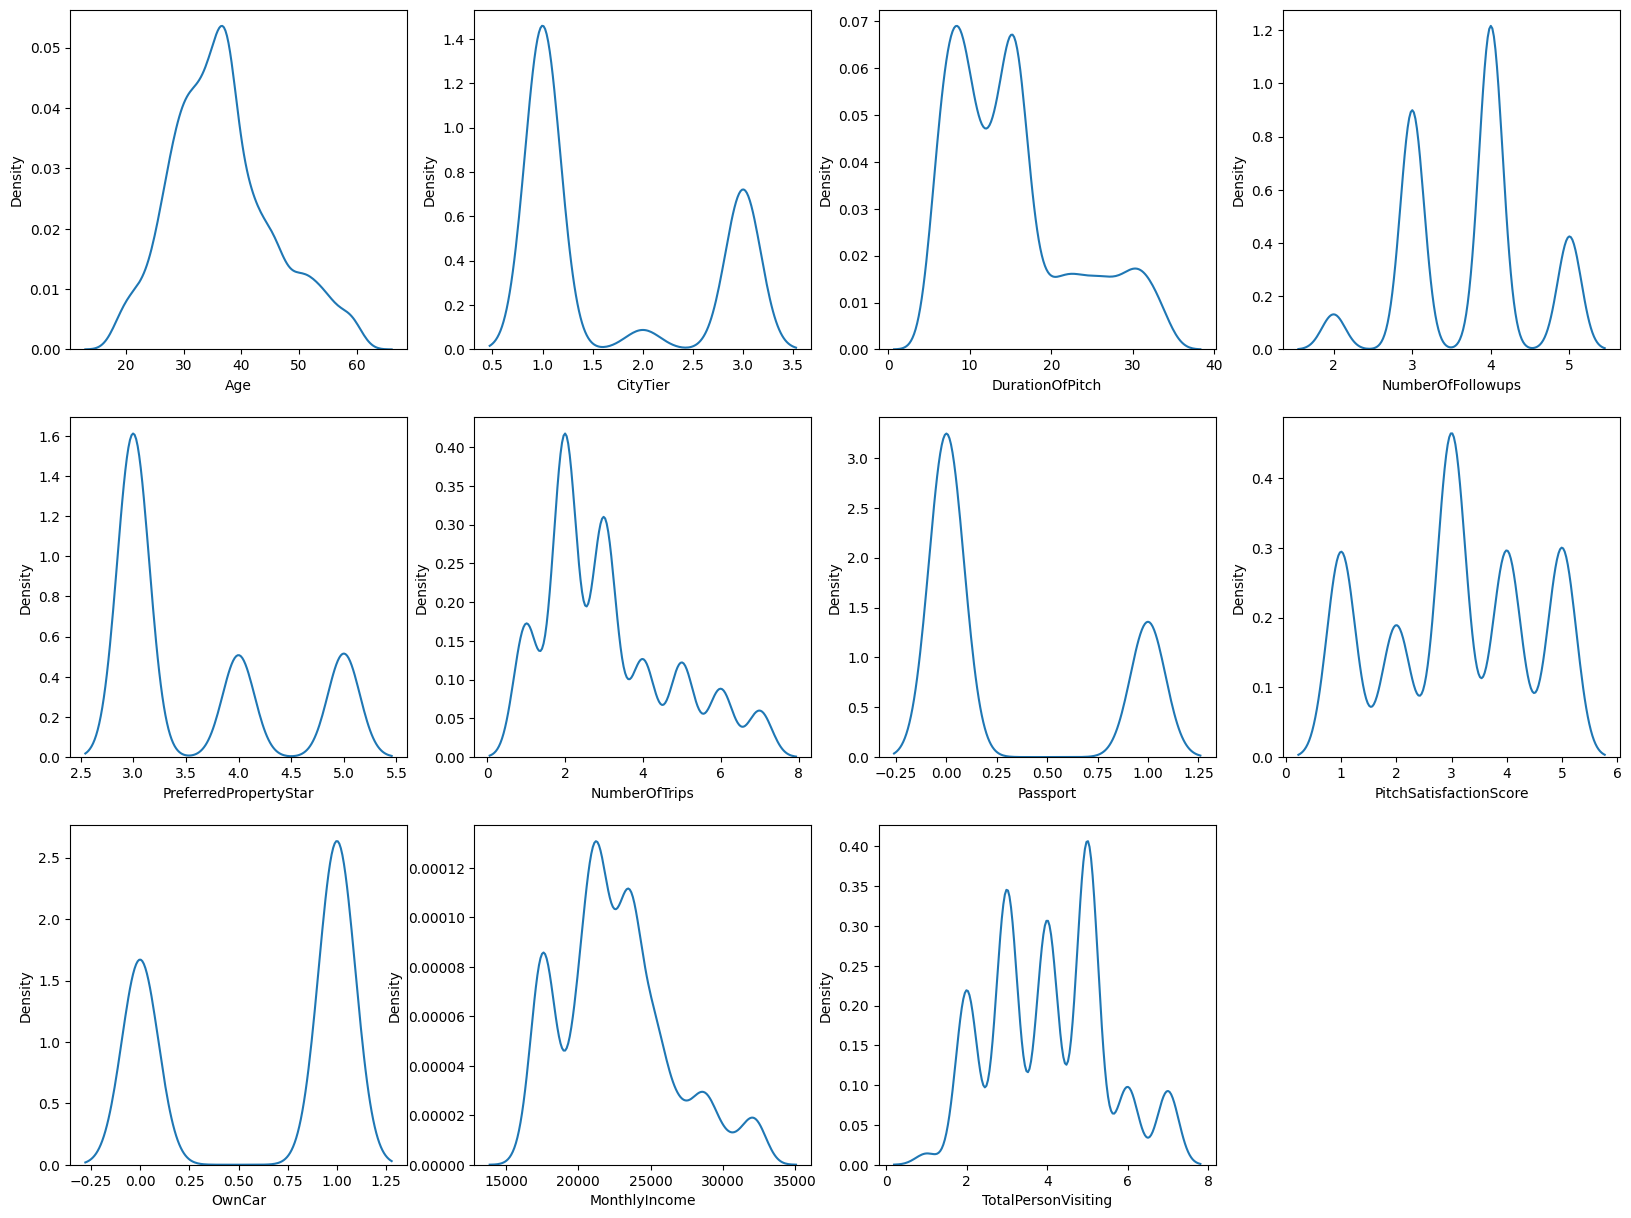

In [601]:
plt.figure(figsize=(20,15))
for i in range(len(numerical2)):
    plt.subplot(3,4,i+1)
    sns.kdeplot(data[numerical2[i]])
    plt.xlabel(numerical2[i])

In [602]:
data[numerical2].skew()

Age                       0.492817
CityTier                  0.687986
DurationOfPitch           0.876876
NumberOfFollowups        -0.083121
PreferredPropertyStar     0.886136
NumberOfTrips             0.818750
Passport                  0.899949
PitchSatisfactionScore   -0.130401
OwnCar                   -0.460298
MonthlyIncome             0.623833
TotalPersonVisiting       0.210283
dtype: float64

In [603]:
data.shape

(4032, 18)

In [604]:
y=data.iloc[:,:1]
y.shape

(4032, 1)

In [605]:
x=data.iloc[:,1:]
x.shape

(4032, 17)

In [606]:
x.head()

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,TotalPersonVisiting
0,41.000000,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Single,1.0,1,2,1,Manager,20993.0,3.0
1,49.000000,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,37.000000,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Single,7.0,1,3,0,Executive,17090.0,3.0
3,33.000000,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
4,37.622265,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,2.0


In [607]:
x_num=[features for features in data.columns if data[features].dtype!="O"][1:]
x_cat=[features for features in data.columns if data[features].dtype=="O"]
x_num,x_cat

(['Age',
  'CityTier',
  'DurationOfPitch',
  'NumberOfFollowups',
  'PreferredPropertyStar',
  'NumberOfTrips',
  'Passport',
  'PitchSatisfactionScore',
  'OwnCar',
  'MonthlyIncome',
  'TotalPersonVisiting'],
 ['TypeofContact',
  'Occupation',
  'Gender',
  'ProductPitched',
  'MaritalStatus',
  'Designation'])

In [608]:
for i in range(len(x_cat)):
    print(data[x_cat[i]].value_counts())

TypeofContact
Self Enquiry       2850
Company Invited    1182
Name: count, dtype: int64
Occupation
Salaried          1942
Small Business    1714
Large Business     375
Free Lancer          1
Name: count, dtype: int64
Gender
Male      2385
Female    1647
Name: count, dtype: int64
ProductPitched
Basic           1636
Deluxe          1525
Standard         674
Super Deluxe     196
King               1
Name: count, dtype: int64
MaritalStatus
Married      1893
Divorced      785
Single        750
Unmarried     604
Name: count, dtype: int64
Designation
Executive         1636
Manager           1525
Senior Manager     674
AVP                196
VP                   1
Name: count, dtype: int64


In [609]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
ct=ColumnTransformer(
    [
        ("OneHotEncoder",OneHotEncoder(),x_cat),
        ("StandardSacler",StandardScaler(),x_num),
    ],
    remainder="passthrough",
)
x=ct.fit_transform(x)
x[0],len(x[0])

(array([ 0.        ,  1.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.48968231,  1.43302773, -1.22103276,
        -0.92162837, -0.73336979, -1.27627978,  1.54631334, -0.79200885,
         0.79605999, -0.42281323, -0.73145312]),
 33)

In [610]:
cols=list(range(33))
ext=[0,2,6,8,13,17]
final_cols=[c for c in cols if c not in ext]

In [611]:
x=x[:,final_cols]
x[0],len(x[0])

(array([ 1.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.48968231,  1.43302773, -1.22103276, -0.92162837,
        -0.73336979, -1.27627978,  1.54631334, -0.79200885,  0.79605999,
        -0.42281323, -0.73145312]),
 27)

In [612]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.25,stratify=y)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((3024, 27), (1008, 27), (3024, 1), (1008, 1))

In [613]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [614]:
from sklearn.model_selection import GridSearchCV
models={
    "LogisticRegression":LogisticRegression(),
    "Naivebayes":GaussianNB(),
    "DecisionTreeClassifier":DecisionTreeClassifier(random_state=42),
    "RandomForestClassifier":RandomForestClassifier(random_state=42,class_weight="balanced"),
    "SVC":SVC(),
}



param_grid={
    "LogisticRegression":{
        "max_iter":[100,150,200,250],
        "penalty" : ['l1', 'l2', 'elasticnet', None],
    },
    "Naivebayes":{},
    "DecisionTreeClassifier":{
        "max_depth":[10,15,20,17,25],
        "criterion":["gini","entropy","log_loss"],
    },
    "RandomForestClassifier":{
        "max_depth":[10,15,20,17,25],
        "criterion":["gini","entropy","log_loss"],
        "n_estimators":[5,10,15,20,25,100],
    },
    "SVC":{
        "kernel":["liner","poly","sigmoid","rbf"],
        "C":[1,1.5,2,2.5,3],
    }
}


In [615]:
i=0
gridcv=pd.DataFrame(columns=["Model","Best_parameter","Best_score"])
for name in models:
    gsc=GridSearchCV(estimator=models[name],param_grid=param_grid[name],cv=5,verbose=1,return_train_score=True)
    gsc.fit(x,y)
    gridcv.loc[i]=[name,gsc.best_params_,gsc.best_score_]
    i=i+1

gridcv

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 15 candidates, totalling 75 fits
Fitting 5 folds for each of 90 candidates, totalling 450 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits


,Model,Best_parameter,Best_score
0,LogisticRegression,"{'max_iter': 100, 'penalty': None}",0.839036
1,Naivebayes,{},0.803072
2,DecisionTreeClassifier,"{'criterion': 'entropy', 'max_depth': 25}",0.922375
3,RandomForestClassifier,"{'criterion': 'entropy', 'max_depth': 17, 'n_e...",0.933283
4,SVC,"{'C': 3, 'kernel': 'poly'}",0.918156


In [616]:
from sklearn.metrics import classification_report,confusion_matrix

In [738]:
rfc=RandomForestClassifier(max_depth=20,criterion="entropy",n_estimators=19,random_state=42,class_weight={0:1,1:5})
rfc.fit(x_train,y_train)
y_pred=rfc.predict(x_test)
rfc.score(x_train,y_train),rfc.score(x_test,y_test)

(0.9983465608465608, 0.9246031746031746)

In [739]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[808   9]
 [ 67 124]]


In [740]:
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.92      0.99      0.96       817
           1       0.93      0.65      0.77       191

    accuracy                           0.92      1008
   macro avg       0.93      0.82      0.86      1008
weighted avg       0.93      0.92      0.92      1008



In [769]:
svc=SVC(kernel="rbf",C=5,class_weight={0:1,1:5})
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
svc.score(x_train,y_train),svc.score(x_test,y_test)

(0.9768518518518519, 0.9097222222222222)

In [770]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[760  57]
 [ 34 157]]


In [771]:
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.96      0.93      0.94       817
           1       0.73      0.82      0.78       191

    accuracy                           0.91      1008
   macro avg       0.85      0.88      0.86      1008
weighted avg       0.91      0.91      0.91      1008

